# Feature Detection Tutorial

Feature detection is the process of scanning computer images to extract bits of identifiable pieces of information. There is no exact universal definition on what constitutes a feature but we can define certain type of features such as edges, corners and blobs (ROI).

<b style="font-size:18px;">Exercise 1.0 - Corner Harris</b>

Using opencv research how to use cv2.cornerHarris() function. 

Download the <a href="https://github.com/dylanseychell/COTSDataset/blob/master/Part%202%20-%20Multiple%20Objects/academic_book_oc/3_colour.jpeg"> colour_3.jpeg</a> from the academic_book_oc found in the COTS dataset. Apply the corner Harris function to extract features from the image. 


Certain algorithms that we covered today’s tutorial might be covered by a license which will not allow you to use to algorithm. As we are using this for research you might need to download opencv-contrib

<i style="color:red">
You need opencv-contrib installed
Uninstall all previous opencv versions

pip install opencv-python==3.4.2.17 <br>
pip install opencv-contrib-python==3.4.2.17
    </i>
    
<a href="https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html
">link</a>






In [1]:
# Imports
import cv2
import numpy as np
from matplotlib import pyplot as plt

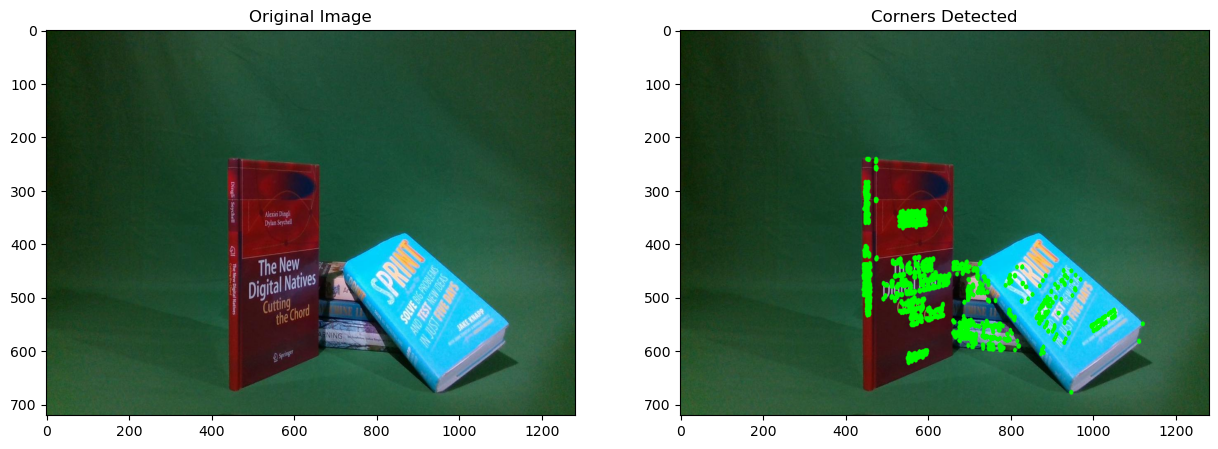

In [2]:
# Load the image
img = cv2.imread('3_colour.jpeg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply the cornerHarris() function
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate the result to mark the corners
dst = cv2.dilate(dst, None)

# Set a threshold for the corners
thresh = 0.01 * dst.max()

# Create a copy of the original image to draw the corners on
img_with_corners = img.copy()

# Draw the corners on the image
for i in range(dst.shape[0]):
    for j in range(dst.shape[1]):
        if dst[i, j] > thresh:
            cv2.circle(img_with_corners, (j, i), 3, (0, 255, 0), 1)

# Create a new figure with a specified size (width, height)
plt.figure(figsize=(15, 5))

# Show the original image and the image with corners detected
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), aspect='auto'), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB), aspect='auto'), plt.title('Corners Detected')
plt.show()

## ↑ <u> Comments (ex.1.1): <u>
    
### In this code, the Harris Corner Detection algorithm is applied to an image using the OpenCV library. The choice of parameters, such as blockSize, ksize, and k, significantly impacts the algorithm's performance and the number of corners detected.
    
### The input image is converted to grayscale as a prerequisite for the Harris Corner Detection algorithm. The detected corners are drawn on a copy of the original image using green circles to highlight their locations visually.

### <u>Parameters and reasoning: <u>
    
#### blockSize=2: Chosen to enable detection of smaller corners while maintaining a balance between false positives and missed corners.
    
#### ksize=3: A trade-off between detecting sharp and larger corners while keeping computational complexity in check.
    
#### k=0.04: Selected to ensure higher sensitivity to corners without producing too many false positives.
    
### <u>Results: <u>
    
### The output images display the original image alongside the image with the detected corners. The side-by-side comparison allows for a clear understanding of the corner detection results. The chosen parameters resulted in a reasonable balance between corner detection accuracy and the number of false positives. Additionally, the visual representation of detected corners using green circles makes it easy to assess the algorithm's performance at a glance. The code can be further improved by exploring different parameter combinations or incorporating additional visualization techniques to better understand the corner detection process.    
___

<b style="font-size:18px;">Exercise 1.1 - Shi-Tomasi Corner Detector</b>

Using opencv research how to use cv2.goodFeaturesToTrack() function.  
Download the <a href="https://github.com/dylanseychell/COTSDataset/blob/master/Part%202%20-%20Multiple%20Objects/academic_book_oc/3_colour.jpeg"> colour_3.jpeg</a> from the academic_book_oc found in the COTS dataset. Apply the Shi-Tomasi Corner Detector to extract features from the image. 
<a href="https://docs.opencv.org/3.4/d4/d8c/tutorial_py_shi_tomasi.html
">link</a>


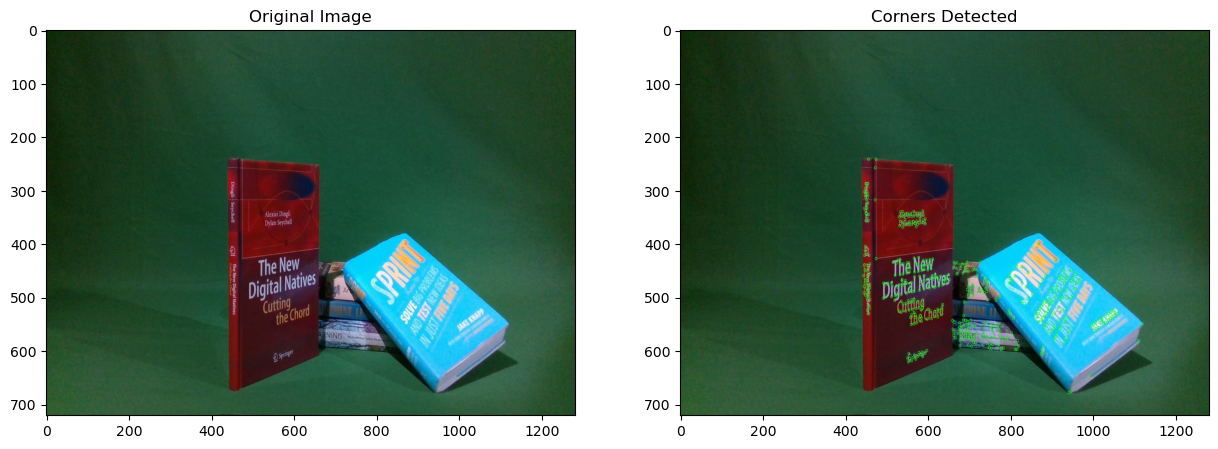

In [3]:
# Load the image
img = cv2.imread('3_colour.jpeg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply the goodFeaturesToTrack() function with modified parameters
corners = cv2.goodFeaturesToTrack(gray, maxCorners=500, qualityLevel=0.001, minDistance=5)
corners = np.int0(corners)

# Create a copy of the original image to draw the corners on
img_with_corners = img.copy()

# Draw the corners on the image
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img_with_corners, (x, y), 3, (0, 255, 0), 1)

# Create a new figure with a specified size (width, height)
plt.figure(figsize=(15, 5))

# Show the original image and the image with corners detected
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), aspect='auto'), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB), aspect='auto'), plt.title('Corners Detected')
plt.show()

## ↑ <u> Comments (ex.1.2): <u>
    
### In this code, the Shi-Tomasi Corner Detection algorithm is applied to an image using the OpenCV library. The choice of parameters, such as maxCorners, qualityLevel, and minDistance, significantly impacts the algorithm's performance and the number of corners detected.
    
### The input image is converted to grayscale as a prerequisite for the Shi-Tomasi Corner Detection algorithm. The detected corners are drawn on a copy of the original image using green circles to highlight their locations visually.
    
### <u>Parameters and reasoning: <u>
    
#### maxCorners=500: Chosen to limit the number of detected corners to a maximum of 500, providing a balance between computational efficiency and corner detection.
    
#### qualityLevel=0.001: Selected to control the minimum quality of the detected corners, with lower values increasing the sensitivity to corners. The value of 0.001 ensures the detection of corners with lower quality without detecting too many false positives.
    
#### minDistance=5: Set to determine the minimum distance between detected corners, preventing clusters of closely located corners. A value of 5 provides a balance between corner separation and detection accuracy.
    
### <u>Results: <u>
    
### The output images display the original image and the image with detected corners side by side, facilitating an easy comparison and understanding of the corner detection outcome. The parameter choices led to a reasonable compromise between detecting accurate corners and limiting false positives. The use of green circles to represent detected corners offers a simple way to evaluate the algorithm visually. To further enhance the code, different parameter combinations can be tested.
___

<b style="font-size:18px;">Exercise 1.2 - SIFT</b>

Using opencv research how to use cv2.xfeatures2d.SIFT_create() function.  
Download the <a href="https://github.com/dylanseychell/COTSDataset/blob/master/Part%202%20-%20Multiple%20Objects/academic_book_oc/3_colour.jpeg"> colour_3.jpeg</a> from the academic_book_oc found in the COTS dataset. Apply the SIFT function to extract features from the image. 

<i style="color:red">
You need opencv-contrib installed
Uninstall all previous opencv versions

pip install opencv-python==3.4.2.17 <br>
pip install opencv-contrib-python==3.4.2.17
    </i>
    
<a href="https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html
">link
</a>


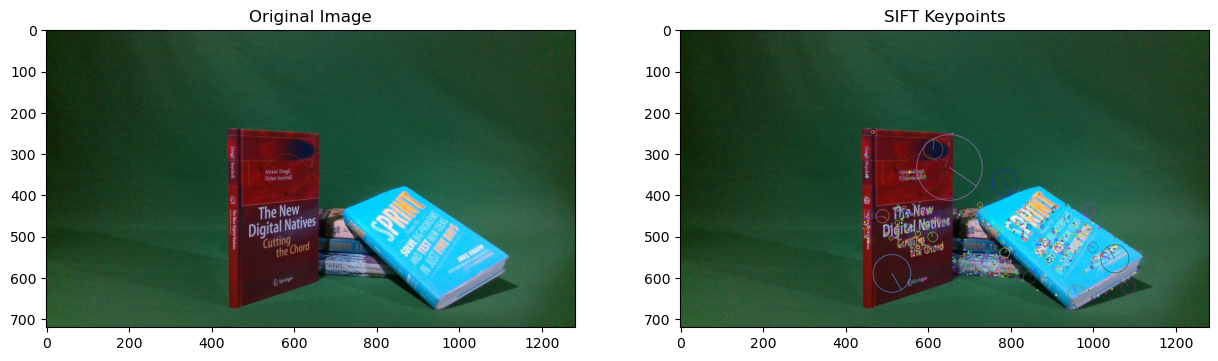

In [4]:
# Load the image
img = cv2.imread('3_colour.jpeg')

# Create a SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(img, None)

# Draw the keypoints on the original image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Create a new figure with a specified size (width, height)
plt.figure(figsize=(15, 5))

# Show the original image and the image with keypoints
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB)), plt.title('SIFT Keypoints')
plt.show()

## ↑ <u> Comments (ex.1.3): <u>
### In this code, the Scale-Invariant Feature Transform (SIFT) algorithm is applied to an image using the OpenCV library. The SIFT algorithm is designed to detect and describe local features in images that are invariant to scale, rotation, and illumination changes.
    
### The input image is processed directly, without the need for grayscale conversion, as the SIFT algorithm internally handles this step. The detected keypoints and their corresponding descriptors are computed using the SIFT object. The keypoints are drawn on a copy of the original image to visualize their locations.
    
### <u>Parameters and reasoning: <u>
    
#### The default SIFT parameters are used in this implementation, as they generally provide satisfactory results for a wide range of applications. However, these parameters can be adjusted based on specific requirements or to optimize the algorithm's performance for a particular dataset.
    
### <u>Results: <u>
    
### The output images display the original image and the image with detected SIFT keypoints side by side, enabling easy comparison and understanding of the feature extraction process. The rich keypoints drawn on the image showcase the scale and orientation information, providing valuable insights into the image's structure.
___

<b style="font-size:18px;">Exercise 1.3 - SURF</b>

Using opencv research how to use cv2.xfeatures2d.SURF_create() function.  
Download the <a href="https://github.com/dylanseychell/COTSDataset/blob/master/Part%202%20-%20Multiple%20Objects/academic_book_oc/3_colour.jpeg"> colour_3.jpeg</a> from the academic_book_oc found in the COTS dataset. Apply the SURF function to extract features from the image. 

<i style="color:red">
You need opencv-contrib installed
Uninstall all previous opencv versions

pip install opencv-python==3.4.2.17 <br>
pip install opencv-contrib-python==3.4.2.17

    </i>
<a href="https://docs.opencv.org/3.4/df/dd2/tutorial_py_surf_intro.html
">link</a>

In [8]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('colour_3.jpeg')

# Create a SURF object
surf = cv2.xfeatures2d.SURF_create()

# Detect keypoints and compute descriptors
kp, des = surf.detectAndCompute(img, None)

# Print the number of keypoints detected
print("Number of keypoints detected:", len(kp))

# Visualize the keypoints on the image
img_keypoints = cv2.drawKeypoints(img, kp, None, (255, 0, 0), 4)
plt.imshow(img_keypoints)
plt.show()

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

<b style="font-size:18px;">Exercise 1.4 - ORB</b>

Using opencv research how to use cv2.ORB_create() function.  
Download the <a href="https://github.com/dylanseychell/COTSDataset/blob/master/Part%202%20-%20Multiple%20Objects/academic_book_oc/3_colour.jpeg"> colour_3.jpeg</a> from the academic_book_oc found in the COTS dataset. Apply ORB function to extract features from the image. 
<i style="color:red">
You need opencv-contrib installed
Uninstall all previous opencv versions

pip install opencv-python==3.4.2.17 <br>
pip install opencv-contrib-python==3.4.2.17

    </i>
<a href="https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html
">link</a>


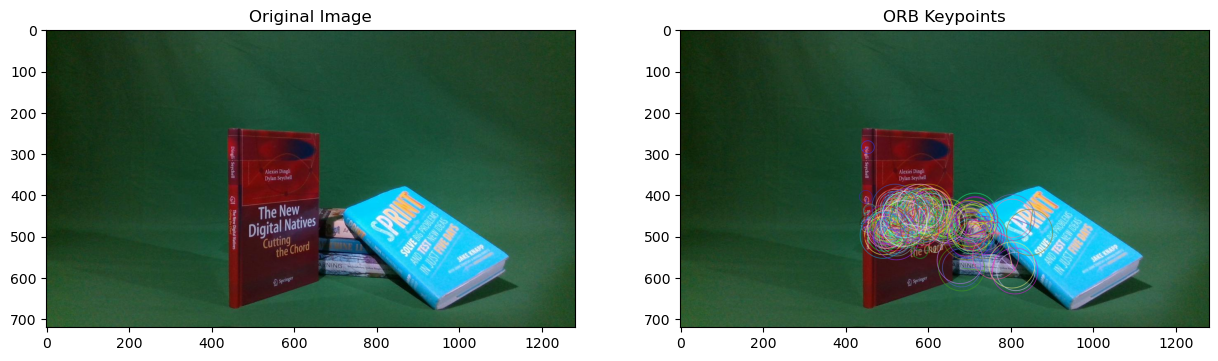

In [9]:
# Load the image
img = cv2.imread('3_colour.jpeg')

# Create an ORB object
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(img, None)

# Draw the keypoints on the original image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Create a new figure with a specified size (width, height)
plt.figure(figsize=(15, 5))

# Show the original image and the image with keypoints
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB)), plt.title('ORB Keypoints')
plt.show()

## ↑ <u> Comments (ex.1.4): <u>
    
### In this code, the ORB (Oriented FAST and Rotated BRIEF) algorithm is utilized on an image using the OpenCV library. ORB is a feature detection and description technique known for its efficiency and strong performance in real-time applications.
    
### The input image is processed directly without converting it to grayscale, as the ORB algorithm takes care of this step internally. The ORB object is used to compute the detected keypoints and their corresponding descriptors. To visualize the keypoints, they are drawn on a copy of the original image.
    
### <u>Parameters and reasoning: <u>
    
#### This implementation employs the default ORB parameters, as they typically yield satisfactory results for various applications. However, these parameters can be modified to cater to specific needs or to enhance the algorithm's performance.
    
### <u>Results: <u>
    
### The output images shows the original image with the image with detected ORB keypoints, allowing for simple comparison and comprehension of the feature extraction process. The image's rich keypoints also provide valuable data about the image's structure.
___

<b style="font-size:18px;">Exercise 1.5 - Segmentation</b>

At this point we went through a number of different feature detectors and created the feature points that describe interesting and unique features within the image. <br>
In the next exercise research how to use the following matching method cv2.BFMatcher() to find the matching images.
Create a program that given two images it matches the features between the images (<a href="https://github.com/dylanseychell/COTSDataset/blob/master/Part%202%20-%20Multiple%20Objects/academic_book_oc/2_colour.jpeg">use the colour_2.jpeg as well as the image used from the previous exercises from the same repository in the COTS dataset</a>).<br>
Document the difference between the different detectors to show which one gave you the best accuracy. 

<a href="https://docs.opencv.org/4.x/d3/da1/classcv_1_1BFMatcher.html">link></a>

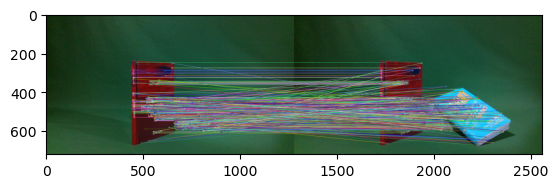

In [10]:
# Load the images
img1 = cv2.imread('2_colour.jpeg')
img2 = cv2.imread('3_colour.jpeg')

# Create a SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Create a BFMatcher object
matcher = cv2.BFMatcher()

# Match the features between the two images
matches = matcher.match(descriptors1, descriptors2)

# Sort the matches based on their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw all matches on the two images
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show the result
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.show()

## ↑ <u> Comments (ex.1.5): <u>
    
### In this code, the Scale-Invariant Feature Transform (SIFT) algorithm is utilized to compare features between a pair of images with the help of the OpenCV library. The procedure includes keypoint detection and descriptor computation for both images, followed by feature matching using the Brute Force (BF) Matcher.
    
### The input images are processed directly, as the SIFT algorithm takes care of the grayscale conversion internally. The keypoints and descriptors for the two images are computed using the SIFT object, while the BFMatcher object matches the features.
    
### <u>Parameters and reasoning: <u>
    
#### The default parameters for SIFT and BFMatcher are applied in this example, as they typically yield satisfactory outcomes across a variety of applications. However, it is essential to note that the default parameters may not always provide optimal results for specific situations. These parameters can be fine-tuned based on specific needs, such as the type of images being compared, the level of noise in the images, or the desired level of accuracy and efficiency.
    
### <u>Results: <u>
    
### The resulting image displays the feature matches between the input images, facilitating an effortless comparison and comprehension of the feature matching process. To ensure higher quality results, the matches are organized according to their distance, which serves as a metric for the similarity between the matched keypoints. By observing the matched features, we can gain insights into the structural similarities between the input images.
___